In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split 


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
df = pd.read_csv("completed_flat_price_2017_2023.csv")

In [6]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146867,2023-02,YISHUN,5 ROOM,874,YISHUN ST 81,01 TO 03,127.0,Improved,1988,64 years 01 month,700000.0,874 YISHUN ST 81 Singapore,103.836161,1.415322
146868,2023-02,YISHUN,5 ROOM,871,YISHUN ST 81,10 TO 12,122.0,Improved,1988,64 years 02 months,700000.0,871 YISHUN ST 81 Singapore,103.837412,1.413099
146869,2023-02,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,68 years 05 months,1068000.0,652 YISHUN AVE 4 Singapore,103.840162,1.423613
146870,2023-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,64 years 10 months,838000.0,325 YISHUN CENTRAL Singapore,103.842030,1.429345


In [7]:
df[df['block']=='406']

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
561,2017-01,JURONG WEST,4 ROOM,406,JURONG WEST ST 42,07 TO 09,106.0,Model A,1984,66 years 07 months,368888.0,406 JURONG WEST ST 42 Singapore,103.722454,1.354302
1456,2017-02,CHOA CHU KANG,4 ROOM,406,CHOA CHU KANG AVE 3,01 TO 03,104.0,Model A,1993,75 years 05 months,340000.0,406 CHOA CHU KANG AVE 3 Singapore,103.740049,1.380195
1861,2017-02,SEMBAWANG,4 ROOM,406,SEMBAWANG DR,07 TO 09,86.0,Model A2,2001,83 years 01 month,342000.0,406 SEMBAWANG DR Singapore,103.817356,1.451494
2464,2017-03,BISHAN,3 ROOM,406,SIN MING AVE,10 TO 12,64.0,Simplified,1987,69 years 02 months,332000.0,406 SIN MING AVE Singapore,103.833785,1.363117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141337,2022-12,BEDOK,5 ROOM,406,BEDOK NTH AVE 3,07 TO 09,118.0,Improved,1980,56 years 09 months,630000.0,406 BEDOK NORTH AVE 3 Singapore,103.934521,1.328206
141563,2022-12,BUKIT PANJANG,5 ROOM,406,FAJAR RD,01 TO 03,122.0,Improved,1989,65 years 03 months,540000.0,406 FAJAR RD Singapore,103.771216,1.380815
142850,2022-12,TAMPINES,3 ROOM,406,TAMPINES ST 41,04 TO 06,64.0,Simplified,1986,63 years,390000.0,406 TAMPINES ST 41 Singapore,103.945978,1.358087
143411,2023-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,55 years 05 months,267000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941


In [5]:
# checking for missing values
df.isna().sum()

month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
remaining_lease         0
resale_price            0
full_address            0
Longitude              30
Latitude                0
dtype: int64

In [8]:
# summary statistics
df.describe()

,floor_area_sqm,lease_commence_date,resale_price,Longitude,Latitude
count,146872.000000,146872.000000,1.468720e+05,146842.000000,146872.000000
mean,97.599526,1995.516661,4.783159e+05,103.842286,1.367348
std,24.088081,13.730146,1.655338e+05,0.070984,0.047009
min,31.000000,1966.000000,1.400000e+05,103.685206,0.000000
25%,82.000000,1985.000000,3.580000e+05,103.783113,1.336819
50%,94.000000,1996.000000,4.480000e+05,103.847457,1.367955
75%,113.000000,2007.000000,5.658000e+05,103.899583,1.396438
max,249.000000,2019.000000,1.418000e+06,103.987631,1.457027


In [11]:
# correlation:
df.corr(numeric_only=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [10]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Draw heatmap
sns.heatmap(corr, cmap="Blues")

plt.show()

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<Figure size 600x400 with 0 Axes>

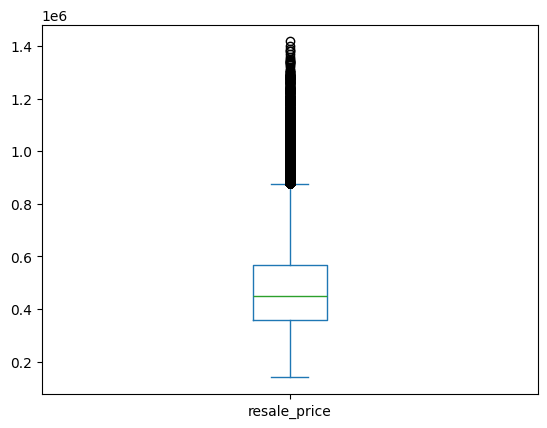

In [9]:

# Plotting a boxplot for resale price


# plt.show()
# Set the size of your plot
plt.figure(figsize=(6, 4))

# Plotting with limited y-axis and without fliers
ax = df[['resale_price']].plot(kind='box')

# Optionally, if you want to use a logarithmic scale
# ax.set_yscale('log')

# Improve the resolution of the plot
plt.gcf().set_dpi(100)

# Show the plot
plt.show()

<Figure size 700x600 with 0 Axes>

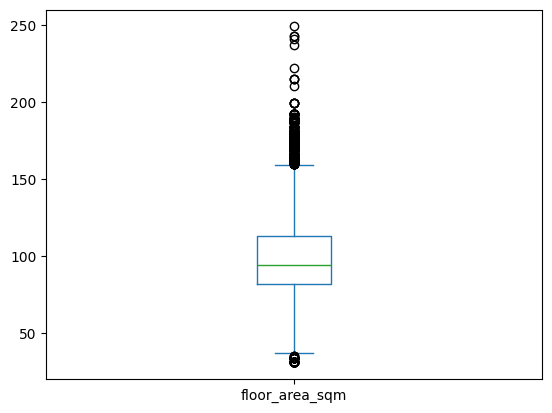

In [10]:

# plotting a boxplot for floor area


# plt.show()
# Set the size of your plot
plt.figure(figsize=(7, 6))

# Plotting with limited y-axis and without fliers
ax = df[['floor_area_sqm']].plot(kind='box')

# Optionally, if you want to use a logarithmic scale
# ax.set_yscale('log')

# Improve the resolution of the plot
plt.gcf().set_dpi(100)

# Show the plot
plt.show()

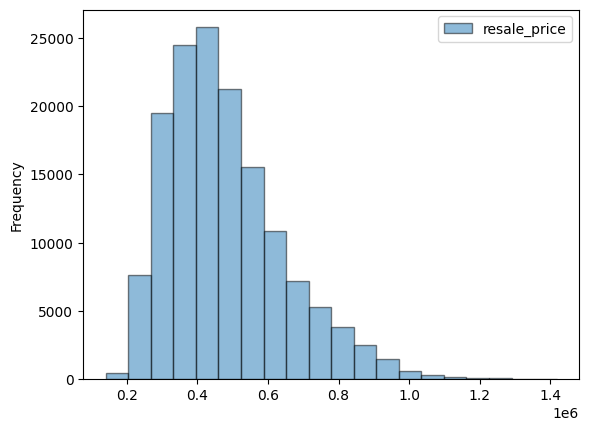

In [11]:
# Plotting histogram for price
df[["resale_price"]].plot(kind='hist', alpha=0.5, bins=20, edgecolor='black' )
plt.show()

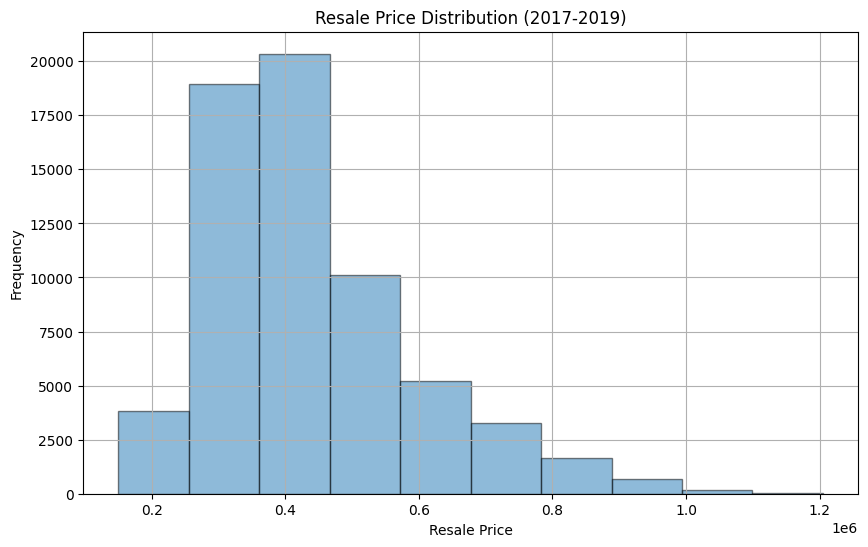

In [12]:
df['date'] = pd.to_datetime(df['month'], format='%Y-%m')

# Selecting data from 2017 to 2020
df_filtered = df[(df['date'].dt.year >= 2017) & (df['date'].dt.year <= 2019)]

# Plotting the resale price histogram
plt.figure(figsize=(10, 6))
df_filtered["resale_price"].plot(kind='hist', alpha=0.5, bins=10, edgecolor='black')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.title('Resale Price Distribution (2017-2019)')
plt.grid(True)
plt.show()

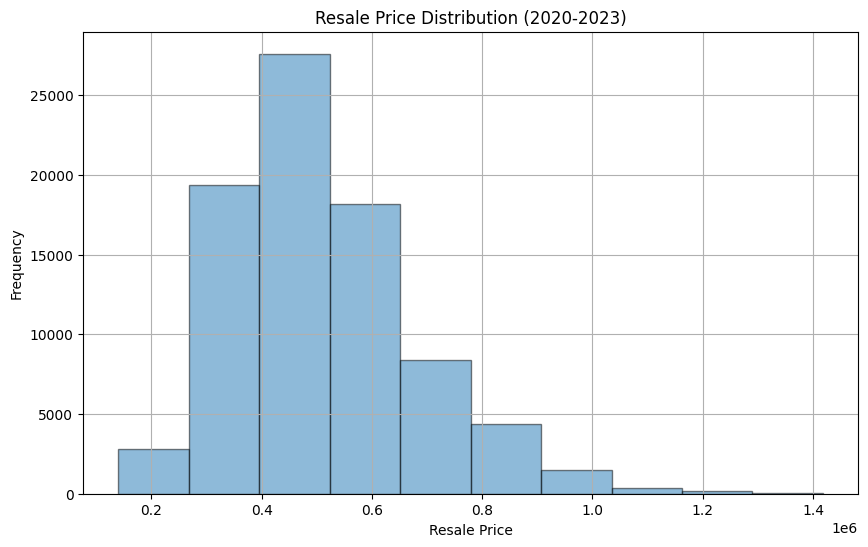

In [13]:
df['date'] = pd.to_datetime(df['month'], format='%Y-%m')

# Selecting data from 2017 to 2020
df_filtered = df[(df['date'].dt.year >= 2020)]

# Plotting the resale price histogram
plt.figure(figsize=(10, 6))
df_filtered["resale_price"].plot(kind='hist', alpha=0.5, bins=10, edgecolor='black')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.title('Resale Price Distribution (2020-2023)')
plt.grid(True)
plt.show()

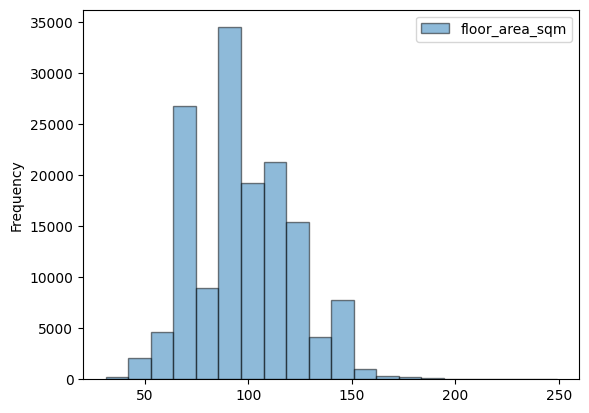

In [14]:
# Plotting histogram for floor area
df[["floor_area_sqm"]].plot(kind='hist', alpha=0.5, bins=20, edgecolor='black')
plt.show()

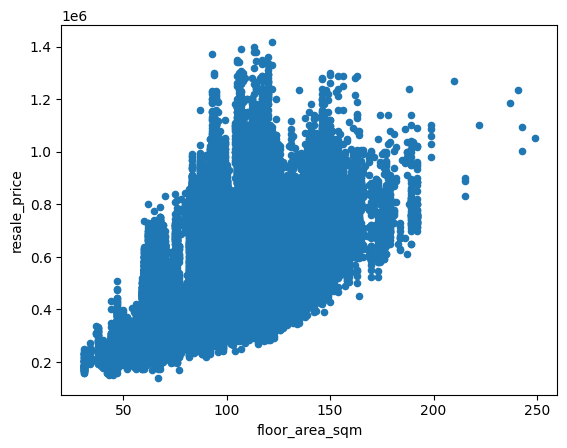

In [15]:
df[['floor_area_sqm', 'resale_price']].plot(kind='scatter', x='floor_area_sqm', y='resale_price')
plt.show()

In [12]:
# pre processing:
# removing outliers (3std away) for resale_price
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd
    
    return (low, high)

lower, upper = three_sd_range(df["resale_price"])
df_cleaned  = df[ (df.resale_price>=lower) & (df.resale_price<=upper)]
df


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146867,2023-02,YISHUN,5 ROOM,874,YISHUN ST 81,01 TO 03,127.0,Improved,1988,64 years 01 month,700000.0,874 YISHUN ST 81 Singapore,103.836161,1.415322
146868,2023-02,YISHUN,5 ROOM,871,YISHUN ST 81,10 TO 12,122.0,Improved,1988,64 years 02 months,700000.0,871 YISHUN ST 81 Singapore,103.837412,1.413099
146869,2023-02,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,68 years 05 months,1068000.0,652 YISHUN AVE 4 Singapore,103.840162,1.423613
146870,2023-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,64 years 10 months,838000.0,325 YISHUN CENTRAL Singapore,103.842030,1.429345


In [13]:
# converting remaining_lease to int format:

def convert_lease_to_int(lease_str):
    parts = lease_str.split()
    years = int(parts[0])
    return years

df_cleaned['remaining_lease_years'] = df['remaining_lease'].apply(convert_lease_to_int)



<ipython-input-13-1ff221e64173>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['remaining_lease_years'] = df['remaining_lease'].apply(convert_lease_to_int)


In [14]:
# encoding flat_type and storey_range to ordinal data:
labelencoder = LabelEncoder()
df_cleaned['flat_type_encoded'] = labelencoder.fit_transform(df_cleaned['flat_type'])
df_cleaned['storey_range_encoded'] = labelencoder.fit_transform(df_cleaned['storey_range'])

df_cleaned

<ipython-input-14-f5b3210c4cfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['flat_type_encoded'] = labelencoder.fit_transform(df_cleaned['flat_type'])
<ipython-input-14-f5b3210c4cfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['storey_range_encoded'] = labelencoder.fit_transform(df_cleaned['storey_range'])


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude,remaining_lease_years,flat_type_encoded,storey_range_encoded
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941,61,1,3
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242,60,2,0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760,62,2,0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223,62,2,1
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987,62,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146866,2023-02,YISHUN,5 ROOM,607,YISHUN ST 61,07 TO 09,121.0,Improved,1987,63 years 07 months,640000.0,607 YISHUN ST 61 Singapore,103.837988,1.419842,63,4,2
146867,2023-02,YISHUN,5 ROOM,874,YISHUN ST 81,01 TO 03,127.0,Improved,1988,64 years 01 month,700000.0,874 YISHUN ST 81 Singapore,103.836161,1.415322,64,4,0
146868,2023-02,YISHUN,5 ROOM,871,YISHUN ST 81,10 TO 12,122.0,Improved,1988,64 years 02 months,700000.0,871 YISHUN ST 81 Singapore,103.837412,1.413099,64,4,3
146870,2023-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,64 years 10 months,838000.0,325 YISHUN CENTRAL Singapore,103.842030,1.429345,64,5,3


In [15]:
# extracting features:
df2= df_cleaned[['month','town', 
                 'flat_type', 'flat_type_encoded',
                 'storey_range', 'storey_range_encoded',
                 'floor_area_sqm', 'remaining_lease_years', 'full_address','resale_price']]
df2

,month,town,flat_type,flat_type_encoded,storey_range,storey_range_encoded,floor_area_sqm,remaining_lease_years,full_address,resale_price
0,2017-01,ANG MO KIO,2 ROOM,1,10 TO 12,3,44.0,61,406 ANG MO KIO AVE 10 Singapore,232000.0
1,2017-01,ANG MO KIO,3 ROOM,2,01 TO 03,0,67.0,60,108 ANG MO KIO AVE 4 Singapore,250000.0
2,2017-01,ANG MO KIO,3 ROOM,2,01 TO 03,0,67.0,62,602 ANG MO KIO AVE 5 Singapore,262000.0
3,2017-01,ANG MO KIO,3 ROOM,2,04 TO 06,1,68.0,62,465 ANG MO KIO AVE 10 Singapore,265000.0
4,2017-01,ANG MO KIO,3 ROOM,2,01 TO 03,0,67.0,62,601 ANG MO KIO AVE 5 Singapore,265000.0
...,...,...,...,...,...,...,...,...,...,...
146866,2023-02,YISHUN,5 ROOM,4,07 TO 09,2,121.0,63,607 YISHUN ST 61 Singapore,640000.0
146867,2023-02,YISHUN,5 ROOM,4,01 TO 03,0,127.0,64,874 YISHUN ST 81 Singapore,700000.0
146868,2023-02,YISHUN,5 ROOM,4,10 TO 12,3,122.0,64,871 YISHUN ST 81 Singapore,700000.0
146870,2023-02,YISHUN,EXECUTIVE,5,10 TO 12,3,146.0,64,325 YISHUN CENTRAL Singapore,838000.0


In [16]:
# Applying one hot encoding to town:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
x = labelbinarizer.fit_transform(df2["town"])
encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
encoded_df.head()




# Normalizing numerical variables:
from sklearn.preprocessing import StandardScaler
columns = [ 'floor_area_sqm', 'remaining_lease_years', 'resale_price']
df2_normalized = StandardScaler().fit_transform(df2[columns])
df2_normalized= pd.DataFrame(df2_normalized, columns = columns)

df2 = df2.reset_index(drop=True)
df2_normalized = df2_normalized.reset_index(drop=True)

df2_normalized[['flat_type_encoded', 'storey_range_encoded']] = df2[['flat_type_encoded', 'storey_range_encoded']]
df2_normalized['year'] = df2['month'].str.slice(0,4)
df2_normalized = pd.concat([df2_normalized, encoded_df], axis=1)
df2_normalized




# 31 columns
# 26 columns are one hot encoded from town
# 145610 rows (encoded_df)




,floor_area_sqm,remaining_lease_years,resale_price,flat_type_encoded,storey_range_encoded,year,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,-2.225324,-0.969351,-1.539479,1,3,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.266810,-1.042624,-1.424603,2,0,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.266810,-0.896079,-1.348019,2,0,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.225135,-0.896079,-1.328874,2,1,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.266810,-0.896079,-1.328874,2,0,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145605,0.983615,-0.822806,1.064368,4,2,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145606,1.233662,-0.749534,1.447287,4,0,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145607,1.025289,-0.749534,1.447287,4,3,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145608,2.025478,-0.749534,2.328000,5,3,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


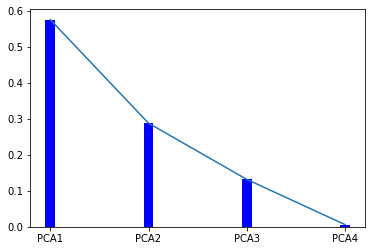

In [17]:
# PCA
from sklearn.decomposition import PCA

# pca = PCA(n_components=3)
pca = PCA(n_components=4)


# x_pca = pca.fit_transform(df2_normalized[['floor_area_sqm', 'remaining_lease_years', 'resale_price']])
x_pca = pca.fit_transform(df2_normalized[['floor_area_sqm', 'remaining_lease_years', 'flat_type_encoded', 'storey_range_encoded']])


x_pca = pd.DataFrame(x_pca)
df4_names = []
y= pca.explained_variance_ratio_

for i in range(len(y)):
    df4_names.append('PCA'+str(i+1))

default_x_ticks = range(len(df4_names))

plt.plot(default_x_ticks, y)
plt.bar(default_x_ticks, y,width=0.1,color= 'blue')
plt.xticks(default_x_ticks, df4_names)
plt.show()


In [18]:
# Splitting into 3 df:
full_dataset = df2_normalized
precovid_dataset = df2_normalized[(df2_normalized['year'] >= "2017") & (df2_normalized['year'] <= "2019")]
postcovid_dataset = df2_normalized[(df2_normalized['year'] >= "2020") ]


In [19]:
# splitting into train-test split for all 3 data sets
# use randome state=42



# For full_dataset:
X1=full_dataset.drop(columns='resale_price')
y1= full_dataset['resale_price']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)


# For precovid_dataset:
X2=precovid_dataset.drop(columns='resale_price')
y2= precovid_dataset['resale_price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


# For postcovid_dataset:
X3=postcovid_dataset.drop(columns='resale_price')
y3= postcovid_dataset['resale_price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)


In [24]:
df2_normalized

,floor_area_sqm,remaining_lease_years,resale_price,flat_type_encoded,storey_range_encoded,year,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,-2.225324,-0.969351,-1.539479,1,3,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.266810,-1.042624,-1.424603,2,0,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.266810,-0.896079,-1.348019,2,0,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.225135,-0.896079,-1.328874,2,1,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.266810,-0.896079,-1.328874,2,0,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145605,0.983615,-0.822806,1.064368,4,2,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145606,1.233662,-0.749534,1.447287,4,0,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145607,1.025289,-0.749534,1.447287,4,3,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145608,2.025478,-0.749534,2.328000,5,3,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
postcovid_dataset

,floor_area_sqm,remaining_lease_years,resale_price,flat_type_encoded,storey_range_encoded,year,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
63984,-1.016762,-1.408986,-1.328874,2,1,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63985,-1.141786,1.228825,-0.020568,2,6,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63986,-1.016762,-1.335714,-1.552243,2,0,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63987,-1.016762,-1.408986,-1.233144,2,1,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63988,-1.225135,-1.115896,-1.616063,2,2,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145605,0.983615,-0.822806,1.064368,4,2,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145606,1.233662,-0.749534,1.447287,4,0,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145607,1.025289,-0.749534,1.447287,4,3,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145608,2.025478,-0.749534,2.328000,5,3,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras import optimizers

In [27]:
postcovid_dataset_ann = postcovid_dataset[['floor_area_sqm', 'remaining_lease_years', 'flat_type_encoded', 'storey_range_encoded']]
X_train, X_test, y_train, y_test = train_test_split(postcovid_dataset_ann, postcovid_dataset[['resale_price']], test_size=0.2)

In [28]:
model = tf.keras.Sequential()
model.add(layers.Dense(4, input_shape=(4,)))
model.add(layers.Dense(4, activation=tf.nn.sigmoid))
model.add(layers.Dense(4, activation=tf.nn.sigmoid))      
model.add(layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


2041/2041 [==============================] - 3s 902us/step - loss: 0.4423 - mae: 0.4991
Epoch 2/50
2041/2041 [==============================] - 2s 858us/step - loss: 0.4015 - mae: 0.4713
Epoch 3/50
2041/2041 [==============================] - 2s 931us/step - loss: 0.4005 - mae: 0.4710
Epoch 4/50
2041/2041 [==============================] - 2s 933us/step - loss: 0.3978 - mae: 0.4699
Epoch 5/50
2041/2041 [==============================] - 2s 910us/step - loss: 0.3974 - mae: 0.4696
Epoch 6/50
2041/2041 [==============================] - 2s 1ms/step - loss: 0.3960 - mae: 0.4686
Epoch 7/50
2041/2041 [==============================] - 2s 1ms/step - loss: 0.3964 - mae: 0.4691
Epoch 8/50
2041/2041 [==============================] - 2s 902us/step - loss: 0.3954 - mae: 0.4684
Epoch 9/50
2041/2041 [==============================] - 2s 943us/step - loss: 0.3954 - mae: 0.4686
Epoch 10/50
2041/2041 [==============================] - 2s 855us/step - loss: 0.3950 - mae: 0.4681
Epoch 11/50

In [30]:
test_mse, test_mae = model.evaluate(X_test, y_test)

511/511 [==============================] - 0s 730us/step - loss: 0.3880 - mae: 0.4664


PreCovid Dataset ANN

In [20]:
X2=precovid_dataset.drop(columns='resale_price')
y2= precovid_dataset['resale_price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [21]:
model = tf.keras.Sequential()
model.add(layers.Dense(4, input_shape=(4,)))
model.add(layers.Dense(4, activation=tf.nn.sigmoid))
model.add(layers.Dense(4, activation=tf.nn.sigmoid))      
model.add(layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['mae'])
model.summary()

NameError: name 'tf' is not defined

In [ ]:
model.fit(X_train2, y_train2, epochs=50)

In [ ]:
test_mse, test_mae = model.evaluate(X_test2, y_test2)